In [2]:
def show_data_summary(input_data):
    print("Describe Data:")
    print(input_data.describe())

    print("\nFirst 10 rows:")
    print(input_data.head(10))
    print("....")

def data_hist(input_data):
    input_data.hist(bins=100, figsize=(20, 12))
    plt.show()

def data_scatter(input_data):
    input_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
    plt.show()

def permutation_split(data, ratio):
    permutation = np.random.permutation(len(data))
    train_size = int(len(data) * (1 - ratio))
    train_index = permutation[:train_size]
    test_index = permutation[train_size:]
    return data.iloc[train_index], data.iloc[test_index]

def encode_label(data):
    encoder = LabelEncoder()
    data["ocean_proximity"] = encoder.fit_transform(data["ocean_proximity"])

def imputer_by_median(data):
    imputer = Imputer(strategy="median")
    X = imputer.fit_transform(data)
    return pd.DataFrame(X, columns=data.columns)

def scale_data(data):
    scalar = MinMaxScaler(feature_range=(0, 100), copy=False)
    scalar.fit_transform(data)

def compare_scale_data(origin, scaled):
    plt.subplot(2, 1, 1)
    plt.scatter(x=origin["longitude"], y=origin["latitude"],
        c=origin["median_house_value"], cmap="viridis", alpha=0.1)
    plt.subplot(2, 1, 2)
    plt.scatter(x=scaled["longitude"], y=scaled["latitude"],
        c=origin["median_house_value"], cmap="viridis", alpha=0.1)
    plt.show()

def show_predict_result(test_data, test_value, predict_value):
    ax = plt.subplot(221)
    plt.scatter(x=test_data["longitude"], y=test_data["latitude"],
        s=test_value, c="dodgerblue", alpha=0.5)
    plt.subplot(222)
    plt.hist(test_value, color="dodgerblue")

    plt.subplot(223)
    plt.scatter(x=test_data["longitude"], y=test_data["latitude"],
        s=predict_value, c="lightseagreen", alpha=0.5)
    plt.subplot(224)
    plt.hist(predict_value, color="lightseagreen")

    plt.show()

def split_house_value(data):
    value = data["median_house_value"].copy()
    return data.drop(["median_house_value"], axis=1), value

def MES_evaluation(test_value, predict_value):
    mse = mean_squared_error(test_value, predict_value)
    return np.sqrt(mse)

数据划分
为了得到预测模型，我们需要将所得到的数据划分成训练集和测试集两个部分。

前者用来训练数据模型，后者用来对于模型进行测试和验证。通常情况下，我们会用大部分的数据来训练，小部分的数据来测试。

在进行数据划分的时候，我们应该做到尽可能的“随机”。即：训练集和测试集都能尽可能的反应真实的数据模型。

permutation
permutation是numpy提供的接口。它将指定范围内的整数打乱以生成随机数。下面是一段代码示例：

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

input_data =  pd.read_csv("./query_result.csv", usecols=[1,2,3,4,5,6,7,8], header=None, names=['x1','x2', 'x3', 'x4', 'x5', 'x6','x7', 'x_true_price',])

#print(input_data)

print("Describe Data:")
print(input_data.describe())

print("\nFirst 10 rows:")
print(input_data.head(10))

input_data.hist(bins=100, figsize=(20, 12))
plt.show()

Describe Data:
               x1          x2          x3          x4          x5          x6  \
count  923.000000  923.000000  923.000000  923.000000  923.000000  923.000000   
mean     5.255818   33.161159    5.463023    5.569718   36.333738   50.064247   
std      2.354354   33.748779    2.286232    2.305955   31.544024    6.727239   
min      1.100000    1.210000    1.100000    1.100000    1.210000   40.350000   
25%      3.630000   13.180000    3.930000    3.975000   15.780000   44.500000   
50%      4.800000   23.080000    5.100000    5.090000   25.940000   50.100000   
75%      6.255000   39.120000    6.500000    6.520000   42.515000   53.850000   
max     17.960000  322.610000   15.810000   15.810000  249.960000   78.950000   

               x7  x_true_price  
count   923.00000    923.000000  
mean   2551.63442      5.201549  
std     706.10230      2.393900  
min    1628.12000      1.100000  
25%    1980.25000      3.545000  
50%    2510.01000      4.610000  
75%    2899.82000

<Figure size 2000x1200 with 9 Axes>

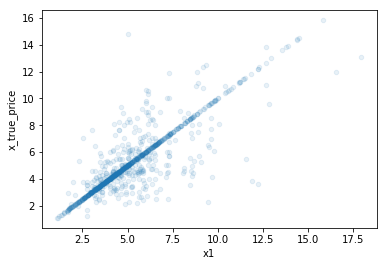

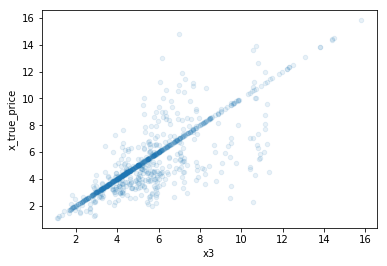

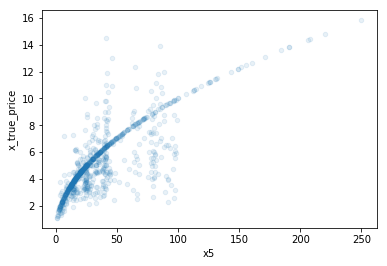

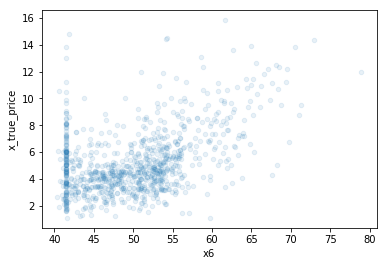

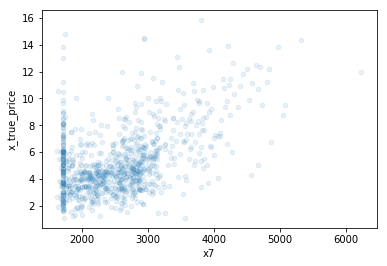

In [7]:
input_data.plot(kind="scatter", x="x1", y="x_true_price", alpha=0.1)
input_data.plot(kind="scatter", x="x3", y="x_true_price", alpha=0.1)
input_data.plot(kind="scatter", x="x5", y="x_true_price", alpha=0.1)
input_data.plot(kind="scatter", x="x6", y="x_true_price", alpha=0.1)
input_data.plot(kind="scatter", x="x7", y="x_true_price", alpha=0.1)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(input_data, test_size=0.1, random_state=59)
#print("data_set: \n {} \n".format(input_data))
#print("train_set: \n {} \n".format(train_set))
#print("test_set: \n {} \n".format(test_set))

show_data_summary(test_set)


Describe Data:
              x1          x2         x3         x4          x5         x6  \
count  93.000000   93.000000  93.000000  93.000000   93.000000  93.000000   
mean    5.098817   29.688602   5.626452   5.661828   36.167527  49.852688   
std     1.930861   24.981029   2.092373   2.038193   26.139588   5.868956   
min     1.500000    2.250000   1.870000   1.500000    2.250000  41.100000   
25%     3.750000   14.060000   4.280000   4.390000   19.270000  44.600000   
50%     4.850000   23.570000   5.100000   5.130000   26.270000  50.550000   
75%     6.000000   36.000000   6.830000   6.540000   42.770000  53.750000   
max    12.220000  149.350000  11.080000  11.220000  125.890000  61.950000   

                x7  x_true_price  
count    93.000000     93.000000  
mean   2519.363871      5.161398  
std     591.632917      2.022077  
min    1689.210000      1.500000  
25%    1989.160000      3.750000  
50%    2555.300000      4.760000  
75%    2889.060000      6.000000  
max    3837

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21a0cc50>,
      dtype=object)

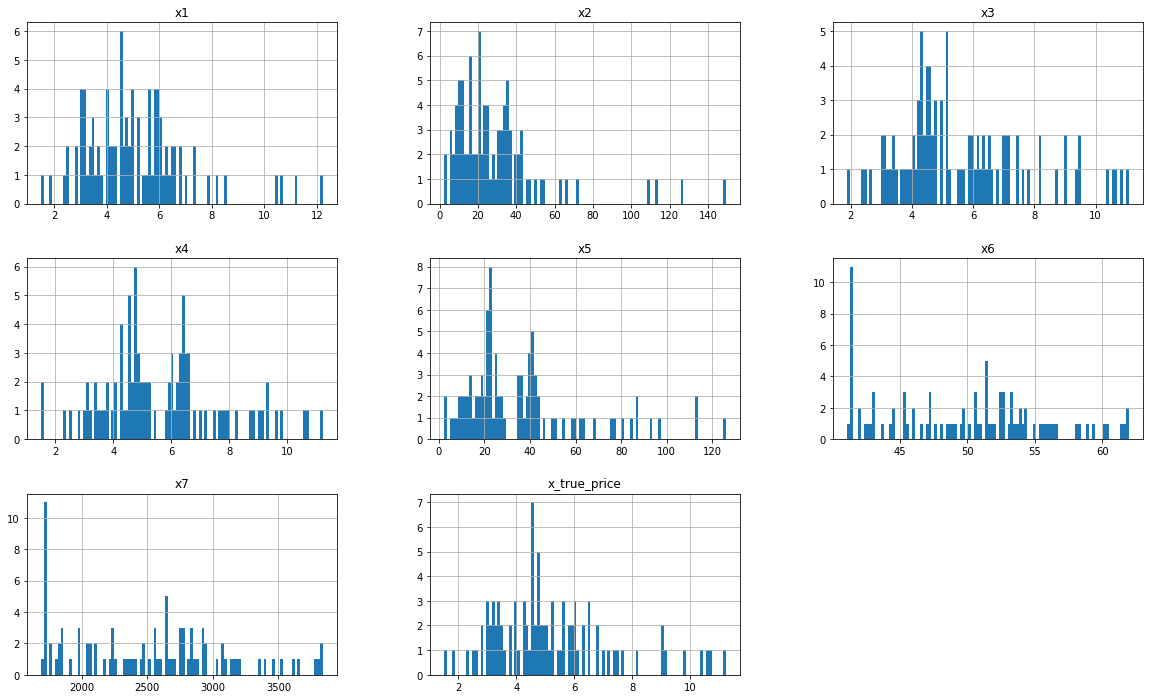

In [9]:
test_set.hist(bins=100, figsize=(20, 12))

直线方程：

\begin{equation}
f(x) =wx+b
\label{eq:当前公式名}
\end{equation}

而我们只要确定w和b，这条直线就确定了。

实际上，决定房价的因素有很多。远远不止年代这一个因素。

在实际的工程中，数据的属性甚至可能有成千上万个。所以我们需要将上面的模型，扩展到多个属性。

给定由n个属性描述的数据 
\begin{equation}
x = (x_1;x_2;...x_n;)
\label{eq:当前公式名}
\end{equation}
其中xi是第i个属性上的取值。

线性模型试图学得一个通过属性的线性组合来进行预测的函数，即：

\begin{equation}
f(x) = w_1x_1+w_2x_2+...+w_nx_n+b;
\end{equation}



如果我们用向量$$x=(x_1;x_2;...x_n;)$$ 和 $$w=(w_1;w_2;...w_n;)$$
来代替，则可以将上面的函数写成这样：$$f(x) = w^tx+b $$


而学习的目的就是确定`w`（向量）和`b`，这样模型就得以确定了。

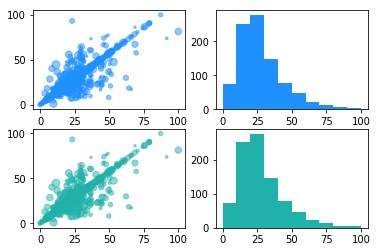

coefficients: [ 0.6997918  -0.26330221  0.2946129   0.05893189  0.18394267 -0.78911897
  0.97803017]
intercept: 0.37063450809928256
0.8252889293716955


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

input_data =  pd.read_csv("./query_result.csv", usecols=[1,2,3,4,5,6,7,8], header=None, names=['x1','x2', 'x3', 'x4', 'x5', 'x6','x7', 'price',])

def scale_data(data):
    scalar = MinMaxScaler(feature_range=(0, 100), copy=False)
    scalar.fit_transform(data)
    
def show_scale_data(org_data, scale_data):
    ax = plt.subplot(221)
    plt.scatter(x=org_data["x1"], y=org_data["price"],
        s=org_data, c="dodgerblue", alpha=0.5)
    plt.subplot(222)
    plt.hist(org_data['price'], color="dodgerblue")

    plt.subplot(223)
    plt.scatter(x=scale_data["x1"], y=scale_data["price"],
        s=scale_data, c="lightseagreen", alpha=0.5)
    plt.subplot(224)
    plt.hist(scale_data['price'], color="lightseagreen")

    plt.show()   

org_data = input_data
scale_data(input_data)

show_scale_data(org_data, input_data)




def split_house_value(data):
    value = data["price"].copy()
    return data.drop(["price"], axis=1), value

# 接着我们使用这个函数将训练集和测试集的数据进行分离：
train_set, test_set = train_test_split(input_data,
test_size=0.1, random_state=59)
train_data, train_value = split_house_value(train_set)
test_data, test_value = split_house_value(test_set)

# linear regression
from sklearn.linear_model import LinearRegression




linear_reg = LinearRegression()
linear_reg.fit(train_data, train_value)

# 系数
print("coefficients:",linear_reg.coef_)

# 截距
print("intercept:",linear_reg.intercept_)


# 是的，短短的三行代码就完成了训练的工作。
# 有了训练好的模型我们就可以用它来进行数据的预测了。
# 这也仅仅只需要一行代码即可：

predict_value = linear_reg.predict(test_data)

print(linear_reg.score(train_data, train_value))

In [30]:
# 最后，我们可以将预测出的结果与实际结果进行对比。以确认我们的预测结果是否准确：
# 在这个函数中，我们针对实际结果和预测结果各绘制了一个散点图和一个直方图。
# 实际结果是蓝色的，预测结果是绿色的。
# 散点图的点代表数值的大小，而直方图中能看出数值的出现频度。

def show_predict_result(test_data, test_value, predict_value):
    ax = plt.subplot(221)
    plt.scatter(x=test_data["x1"], y=test_data["x3"],
        s=test_value, c="dodgerblue", alpha=0.5)
    plt.subplot(222)
    plt.hist(test_value, color="dodgerblue")

    plt.subplot(223)
    plt.scatter(x=test_data["x1"], y=test_data["x3"],
        s=predict_value, c="lightseagreen", alpha=0.5)
    plt.subplot(224)
    plt.hist(predict_value, color="lightseagreen")

    plt.show()

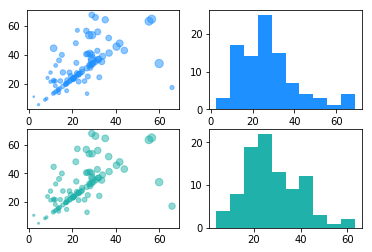

In [31]:
show_predict_result(test_data, test_value, predict_value)

In [49]:
# 回归任务最常用的性能度量是均方误差（mean squared error，简称MSE）
# 这个算法是将预测值与实际值相减求平方，然后对所有的平方结果取平均值。
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(test_value, predict_value)
print("Diff: {}".format(np.sqrt(mse)))

mse = np.mean((predict_value - test_value) ** 2)

print("Diff: {}".format(np.sqrt(mse)))



Diff: 6.299892364719834
Diff: 6.299892364719835


SSE(和方差、误差平方和)：The sum of squares due to error

MSE(均方差、方差)：Mean squared error

RMSE(均方根、标准差)：Root mean squared error

R-square(确定系数)：Coefficient of determination

Adjusted R-square：Degree-of-freedom adjusted coefficient of determination